Тема «Создание признакового пространства»
Продолжим обработку данных с Твиттера.
1. Создайте мешок слов с помощью
sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
  *   Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
  *   Ограничим количество слов, попадающий в мешок, с помощью max_features =1000.
  *  Исключим стоп-слова с помощью stop_words='english'.
  *  Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().
2. Создайте мешок слов с помощью sklearn.feature_extraction.textTfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
  *   Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
  *   Ограничим количество слов, попадающий в мешок, с помощью max_features =1000.
  *  Исключим стоп-слова с помощью stop_words='english'.
  *  Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью  TfidfVectorizer.get_feature_names().
3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы.

In [1]:
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
TRAIN_PATH = '/content/sample_data/df_tweets.csv'

In [3]:
df_train = pd.read_csv(TRAIN_PATH, sep=',')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49159 non-null  int64  
 1   label                 31962 non-null  float64
 2   tweet                 49157 non-null  object 
 3   tweet_token           49159 non-null  object 
 4   tweet_token_filtered  49159 non-null  object 
 5   tweet_stemmed         49159 non-null  object 
 6   tweet_lemmatized      49159 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


#1.

In [4]:
def feature_extract(data, model_vectorizer):
    # Создаем модель
    vectorizer = model_vectorizer.fit_transform(data)

    # Отобразим Bag-of-Words модель как DataFrame
    feature_names = model_vectorizer.get_feature_names_out()
    vectorizer = pd.DataFrame(vectorizer.toarray(), columns = feature_names)

    return vectorizer

In [5]:
count_vectorizer = CountVectorizer(max_df=0.9, max_features=1000, stop_words='english')

#'tweet_stemmed' 
# Отобразим Bag-of-Words модель как DataFrame
tweet_stemmed_bag_of_words = feature_extract(df_train['tweet_stemmed'], count_vectorizer)

#'tweet_lemmatized' 
# Отобразим CountVectorizer модель как DataFrame
tweet_lemmatized_bag_of_words = feature_extract(df_train['tweet_lemmatized'], count_vectorizer)


tweet_stemmed_bag_of_words.shape, tweet_lemmatized_bag_of_words.shape

((49159, 1000), (49159, 1000))

#2.

In [6]:
#'tweet_stemmed' 
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english')

#'tweet_stemmed' 
# Отобразим Bag-of-Words модель как DataFrame
tweet_stemmed_vectorizer = feature_extract(df_train['tweet_stemmed'], tfidf_vectorizer)

#'tweet_lemmatized' 
# Отобразим CountVectorizer модель как DataFrame
tweet_lemmatized_vectorizer = feature_extract(df_train['tweet_lemmatized'], tfidf_vectorizer)


tweet_stemmed_vectorizer.shape, tweet_lemmatized_vectorizer.shape

((49159, 1000), (49159, 1000))

#3.

In [9]:
data = open('/content/sample_data/corpus.txt').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [10]:
# массив для ошибок, чтобы потом построить график
array_errors = pd.DataFrame(columns=['max_features', 'accuracy'])

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

for i in np.arange(100, 1001, 50):
    
    vect = CountVectorizer(max_df=0.9, max_features=i, stop_words='english')
    vect.fit(trainDF['text'])

    xtrain_count = vect.transform(train_x)
    xvalid_count = vect.transform(valid_x)

    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    array_errors = array_errors.append({'max_features': i, 'accuracy': round(accuracy_score(valid_y, predictions)*100,2)}, ignore_index=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [13]:
array_errors.sort_values(by=['accuracy'], ascending=False)

,max_features,accuracy
17,950.0,81.76
14,800.0,81.72
18,1000.0,81.60
13,750.0,81.52
16,900.0,81.48
15,850.0,81.40
11,650.0,81.28
12,700.0,80.96
10,600.0,80.88
8,500.0,80.28


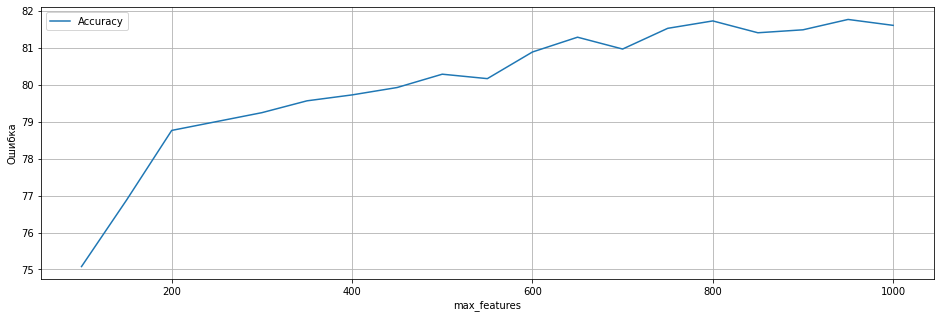

In [12]:
plt.figure(figsize = (16,5))
plt.plot(array_errors['max_features'], array_errors['accuracy'], label = 'Accuracy')
plt.xlabel('max_features')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

In [14]:
array_errors = pd.DataFrame(columns=['max_features', 'accuracy'])

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

for i in np.arange(100, 1001, 50):
    
    vect = TfidfVectorizer(max_df=0.9, max_features=i, stop_words='english')
    vect.fit(trainDF['text'])

    xtrain_count = vect.transform(train_x)
    xvalid_count = vect.transform(valid_x)

    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    array_errors = array_errors.append({'max_features': i, 'accuracy': round(accuracy_score(valid_y, predictions)*100,2)}, ignore_index=True)

In [15]:
array_errors.sort_values(by=['accuracy'], ascending=False)

,max_features,accuracy
18,1000.0,84.56
17,950.0,84.48
14,800.0,83.96
16,900.0,83.84
15,850.0,83.72
13,750.0,83.68
12,700.0,83.56
11,650.0,83.48
10,600.0,83.20
9,550.0,82.52


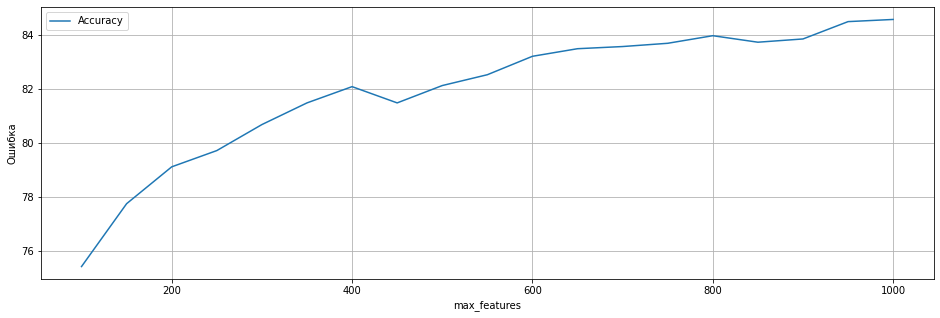

In [16]:
plt.figure(figsize = (16,5))
plt.plot(array_errors['max_features'], array_errors['accuracy'], label = 'Accuracy')
plt.xlabel('max_features')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

In [17]:
# массив для ошибок, чтобы потом построить график
array_errors = pd.DataFrame(columns=['n_components', 'accuracy'])

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

for i in np.arange(10, 101, 10):
    vect = TfidfVectorizer(max_df=0.9, max_features=900, stop_words='english')
    vect.fit(trainDF['text'])

    xtrain_count =  vect.transform(train_x)
    xvalid_count =  vect.transform(valid_x)

    #PCA
    pca = PCA(n_components=i)
    pca.fit(xtrain_count.toarray())

    xtrain_pca = pca.transform(xtrain_count.toarray())
    xvalid_pca = pca.transform(xvalid_count.toarray())

    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_pca, train_y)
    predictions = classifier.predict(xvalid_pca)

    array_errors = array_errors.append({'n_components': i, 'accuracy': round(accuracy_score(valid_y, predictions)*100,2)}, ignore_index=True)

In [18]:
array_errors.sort_values(by=['accuracy'], ascending=False)

,n_components,accuracy
5,60.0,81.00
8,90.0,80.72
6,70.0,80.64
9,100.0,80.64
4,50.0,80.52
7,80.0,80.52
3,40.0,79.76
2,30.0,79.24
1,20.0,76.88
0,10.0,74.44


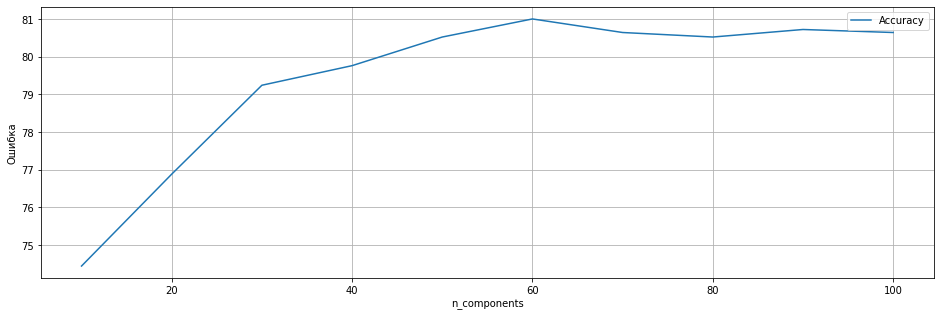

In [19]:
plt.figure(figsize = (16,5))
plt.plot(array_errors['n_components'], array_errors['accuracy'], label = 'Accuracy')
plt.xlabel('n_components')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()